In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report, confusion_matrix, plot_precision_recall_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#import warnings
#warnings.filterwarnings("ignore")

In [5]:
# option d'affichage des résultats
#pd.set_option("display.max_row",130)
pd.set_option("display.max_columns",100)

In [6]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [7]:
#data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data = data_orig.copy()
data

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon
0,000000010010000001,02,81,08,91,09,06,21,21,01,71,41,07,04,12,04,20,02,02,01,51,05,1
1,000000020010000006,01,75,07,43,04,06,06,13,02,71,64,07,06,12,09,04,12,04,13,12,01,1
2,000000030010000011,01,76,07,43,04,06,06,16,03,54,81,05,08,07,12,06,06,04,18,36,03,2
3,000000040010000013,03,75,07,43,04,04,06,13,01,71,36,07,03,12,11,11,19,04,06,21,02,1
4,000000050010000015,02,33,03,44,04,06,07,12,01,71,42,07,04,12,05,14,03,03,01,14,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219994,010928800370109343,01,64,06,82,08,05,16,17,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1219995,010928810370109344,03,61,06,64,06,06,14,01,04,44,81,04,08,05,12,01,05,01,03,54,05,NaN
1219996,010928820370109345,02,13,01,42,04,07,07,15,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1219997,010928830370109346,02,31,03,82,08,08,16,19,02,71,45,07,04,12,03,02,02,03,01,44,04,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219999 entries, 0 to 1219998
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   IDENT               1219999 non-null  object
 1   TypeHabi            1219999 non-null  object
 2   GeoFaz_Scl          1219999 non-null  object
 3   GeoFaz_cl           1219999 non-null  object
 4   ImmoFaz_Scl         1219999 non-null  object
 5   ImmoFaz_cl          1219999 non-null  object
 6   Anciennete          1219999 non-null  object
 7   Logement_prix_m2    1219999 non-null  object
 8   Mediane_RFR         1219999 non-null  object
 9   Sexe                1219999 non-null  object
 10  Prenom_Phase_scl_H  1219999 non-null  object
 11  Prenom_Phase_scl_F  1219999 non-null  object
 12  Prenom_Phase_cl_H   1219999 non-null  object
 13  Prenom_Phase_cl_F   1219999 non-null  object
 14  Age_H               1219999 non-null  object
 15  Age_F               1219999 non-

In [9]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff

# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    colonnes = tableau_corr.columns
    val_temp = 0 
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))
                    val_temp += 1

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
                val_temp += 1

            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
                val_temp += 1
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0
    if val_temp == 0:
        print("IL N'Y A PAS DE CORRELATION ENTRE LES VARIABLES PAR RAPPORT AU SEUIL PRIS")
        

def evaluation(model, X_train, y_train, X_test, y_test, scoring, plot):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("test set : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred)) 
    print("train set : ")
    print(confusion_matrix(y_train, model.predict(X_train)))  
    print(classification_report(y_train, model.predict(X_train) ))

    if plot == True:
        N, train_score, val_score = learning_curve(model, X_train, y_train, shuffle=True, cv = 4, scoring = scoring, train_sizes = np.linspace(0.1, 1, 6) )

        plt.figure(figsize = (10,6))
        plt.plot(N, train_score.mean(axis=1), label ="train_score")
        plt.plot(N, val_score.mean(axis=1), label ="cross_validation_score")
        plt.legend()
    else :
        print("GRAPHIQUE NON DEMANDE")

# Comme il n'y a pas de valeurs manquantes (à la place il y a un nombre), le seul traitement qu'on fait c'est tranformer
# le type de variable (les variables continues deviennent qualitatives)
def data_processing(df):
    """ 
    for i in range(0,len(df.columns)):    
        df[df.columns[i]].fillna(100.0, inplace=True) #On remplace les données manquantes par 100
    for i in range(0,len(df.columns)):
        print(df[df.columns[i]].value_counts(dropna=False))    
    """
    
   #Transformation de toutes les variables en facteurs         
    for i in range(0,len(df.columns)):
        df[df.columns[i]] = df[df.columns[i]].astype('category')
    return df.to_numpy() #.as_matrix()


def vingtiles(model, data_orig, affichage, save, path):
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe IFI+)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # quarantiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    #print(df_tous)
    
    # pour la colonne Top_mon :
    # remplissage de la dernière colonne par 2 (VALABLE QUE POUR CE DATA, MODIFIER POUR D'AUTRES)
    data_temp_t = data_orig.copy()
    # remplacement
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(1.0,'1')
    data_temp_t["Top_mon"] =  data_temp_t["Top_mon"].replace(2.0,'2')
    data_all_complet_class = data_temp_t.fillna('2')
    #data_all_complet_class

    # jointure
    ident_class_tous = data_all_complet_class[["IDENT","Top_mon"]]
    tableau_resultats = pd.merge(df_tous,ident_class_tous)
    #tableau_resultats

    # tranches finales
    tab_cross_temp = pd.crosstab(tableau_resultats["TRANCHES"],tableau_resultats["Top_mon"])
    #print(tab_cross_temp); print("-----------------------")

    # création d'une colonne total
    tab_cross_temp["TOTAL"]=tab_cross_temp["1"]+tab_cross_temp["2"]
    
    # affichage
    if affichage ==True:        
        print(tab_cross_temp)

    # création du tableau final en éliminant la colonne 2
    #tab_pour_excel = tab_cross_temp.drop(["2"], axis=1)

    # si on ne veut pas éliminer la colonne 2
    tab_pour_excel =  tab_cross_temp
    
    # enregistrement sous Excel
    if save == True:
        tab_pour_excel.to_excel(path)

    return tab_pour_excel  


def vingtiles_ind_sans_target(model, data_orig, affichage, save, path):
    # position de la dernière variable explicative dans le dataset
    nb_var = data_orig.shape[1]-1

    # predict sur tous les individus (avec et sans classe IFI+)
    tous_probas = model.predict_proba(data_orig.iloc[:,1:nb_var])
    df_tous = pd.DataFrame({'IDENT': data_orig.iloc[:,0] , 'PROBA': tous_probas[:,0] })
    #df_tous
    
    # valeurs ordonnées pour diviser après
    df_tous=df_tous.sort_values(by='PROBA', ascending=True)
    #df_tous
    print(df_tous)
    
    #vérification
    print(df_tous['PROBA'].value_counts())

    # quarantiles
    df_temp =pd.DataFrame( pd.qcut(df_tous['PROBA'],q= 20)  )
    print(df_temp)

    # ajout par index (IMPORTANTE)
    df_tous["TRANCHES"]=pd.DataFrame(df_temp.iloc[:,0].to_numpy(),index= df_temp.index)
    print(df_tous)
    print(df_tous["TRANCHES"].value_counts(ascending = True))

    # GERE L'ORDRE
    patra = np.unique(df_tous.iloc[:,2], return_counts=True)
    df_tranches_sans_target = pd.DataFrame([patra[0],patra[1]]).T
    df_tranches_sans_target.columns=["TRANCHES","COUNTS"]

    # affichage
    if affichage ==True:        
        print(df_tranches_sans_target)
    
    # enregistrement sous Excel
    if save == True:
        df_tranches_sans_target.to_excel(path)

      

# élimination des variables trop corrélées (choix manuel)
def elimination_val_corr(data):
    data = data.drop(columns=[""])
    return data
          



In [10]:
#################################################################################################
#                       SANS VARIABLES CORR ET ENCODAGE DUMMIES
#################################################################################################

In [26]:
# test predict individus sans classe
data = data_orig.copy()

# on élimine les variables dons
data=data.drop(["GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Prenom_Phase_cl_H", "Prenom_Phase_cl_F",
                "Onoma-Phase_Scl", "Onoma-Phase_CL"],axis=1)

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe Top_mon
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [11]:
#######################################################################################################
#######################################################################################################

In [ ]:

#############################################################
#                          TEST
#############################################################


In [44]:
#model_17_cw =("logistic", LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") )
#final_model_AdaBoost = ("Adaboost" , AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight="balanced", criterion="entropy",max_depth=2),n_estimators = 50 , random_state=0) )
final_model_RandomForestClassifier =('Random', RandomForestClassifier(class_weight="balanced", criterion="entropy", max_depth=2, max_features=25, n_estimators = 100, random_state=0) ) 
#final_model_ExtraTreesClassifier = ("Extra", ExtraTreesClassifier( criterion="entropy", max_depth=2, max_features=25, n_estimators=100 , class_weight="balanced", random_state=0) )
final_model_DecisionTreeClassifier =("Tree" , DecisionTreeClassifier(random_state = 0, criterion="gini", class_weight = "balanced", max_depth = 2, max_features=13, min_samples_split=0.05 ))


models = [model_17_cw, final_model_AdaBoost, final_model_RandomForestClassifier, final_model_ExtraTreesClassifier]


In [45]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") , cv=5)

evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)

test set : 
[[ 2572  2107]
 [ 7682 13062]]
              precision    recall  f1-score   support

           1       0.25      0.55      0.34      4679
           2       0.86      0.63      0.73     20744

    accuracy                           0.61     25423
   macro avg       0.56      0.59      0.54     25423
weighted avg       0.75      0.61      0.66     25423

train set : 
[[10526  8251]
 [29921 52994]]
              precision    recall  f1-score   support

           1       0.26      0.56      0.36     18777
           2       0.87      0.64      0.74     82915

    accuracy                           0.62    101692
   macro avg       0.56      0.60      0.55    101692
weighted avg       0.75      0.62      0.67    101692

GRAPHIQUE NON DEMANDE


In [53]:
table_test =vingtiles(model = model_Stacking, data_orig = data, affichage=True,
            save=False, path = "/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/Fichier_excel_vingtiles/train_test_Decision_Tree_Classifier.xlsx")

                     IDENT     PROBA
22780   000227810010281361  0.270993
114600  001146010010525575  0.278816
112625  001126260010522654  0.279276
87934   000879350010401859  0.282481
87933   000879340010401859  0.282481
...                    ...       ...
77961   000779620010392936  0.814863
107367  001073680010503920  0.816725
106585  001065860010500476  0.816777
107473  001074740010504178  0.816777
99430   000994310010412631  0.816777

[127115 rows x 2 columns]
0.813289    50
0.716189    33
0.640071    33
0.696449    26
0.699399    23
            ..
0.448375     1
0.364017     1
0.550734     1
0.631058     1
0.444801     1
Name: PROBA, Length: 96552, dtype: int64
                 PROBA
22780    (0.27, 0.356]
114600   (0.27, 0.356]
112625   (0.27, 0.356]
87934    (0.27, 0.356]
87933    (0.27, 0.356]
...                ...
77961   (0.663, 0.817]
107367  (0.663, 0.817]
106585  (0.663, 0.817]
107473  (0.663, 0.817]
99430   (0.663, 0.817]

[127115 rows x 1 columns]
Top_mon            1

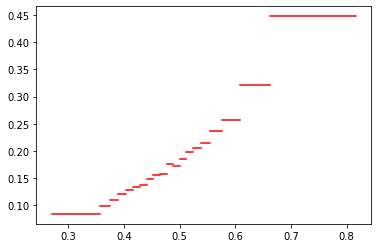

In [138]:
#plt.plot(table_test.index.astype(str)[0],[table_test.iloc[0,0]]*10)
val_ind = 0
for i in table_test.index :
    
    plt.plot([i.left,i.right], [table_test.iloc[val_ind,0]/table_test.iloc[val_ind,2]]*2, 'red' )
    val_ind+=1


[630, 630]


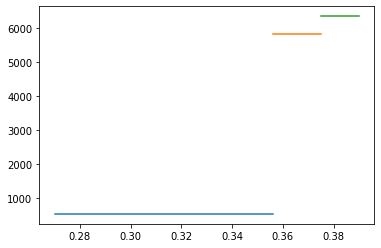

In [133]:
table_test.index.astype(str)[0]
plt.plot([0.27,0.356], [table_test.iloc[0,0]]*2 , '-')
plt.plot([0.356, 0.375], [table_test.iloc[0,1]]*2 )
plt.plot([0.375, 0.39], [table_test.iloc[0,2]]*2 )
print([table_test.iloc[1,0]]*2)

In [28]:
model_17_cw =("logistic", LogisticRegression(random_state =0, solver="newton-cg", max_iter= 10000, class_weight="balanced") )
final_model_AdaBoost = ("Adaboost" , AdaBoostClassifier(base_estimator = DecisionTreeClassifier(class_weight="balanced", criterion="entropy",max_depth=2),n_estimators = 50 , random_state=0) )
final_model_RandomForestClassifier =('Random', RandomForestClassifier(class_weight="balanced", criterion="entropy", max_depth=2, max_features=25, n_estimators = 100, random_state=0) ) 

models = [model_17_cw, final_model_AdaBoost, final_model_RandomForestClassifier]

In [29]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(random_state =0, C=0.01,penalty="l2" , solver="newton-cg", max_iter= 10000, class_weight="balanced") , cv=5)
evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


test set : 
[[ 2565  2114]
 [ 7664 13080]]
              precision    recall  f1-score   support

           1       0.25      0.55      0.34      4679
           2       0.86      0.63      0.73     20744

    accuracy                           0.62     25423
   macro avg       0.56      0.59      0.54     25423
weighted avg       0.75      0.62      0.66     25423

train set : 
[[10564  8213]
 [29811 53104]]
              precision    recall  f1-score   support

           1       0.26      0.56      0.36     18777
           2       0.87      0.64      0.74     82915

    accuracy                           0.63    101692
   macro avg       0.56      0.60      0.55    101692
weighted avg       0.75      0.63      0.67    101692

GRAPHIQUE NON DEMANDE


In [34]:
model_17_cw =("logistic", LogisticRegression(random_state =0, solver="newton-cg", max_iter= 10000) )
final_model_AdaBoost = ("Adaboost" , AdaBoostClassifier(base_estimator = DecisionTreeClassifier( criterion="entropy",max_depth=5),n_estimators = 50 , random_state=0) )
final_model_RandomForestClassifier =('Random', RandomForestClassifier( criterion="entropy", max_depth=5, max_features=7, n_estimators = 100, random_state=0) ) 

models = [model_17_cw, final_model_AdaBoost, final_model_RandomForestClassifier]

In [38]:
model_Stacking = StackingClassifier(estimators=models, final_estimator=LogisticRegression(class_weight="balanced") , cv=5)
evaluation(model_Stacking, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


test set : 
[[ 2369  2310]
 [ 6632 14112]]
              precision    recall  f1-score   support

           1       0.26      0.51      0.35      4679
           2       0.86      0.68      0.76     20744

    accuracy                           0.65     25423
   macro avg       0.56      0.59      0.55     25423
weighted avg       0.75      0.65      0.68     25423

train set : 
[[ 9748  9029]
 [25545 57370]]
              precision    recall  f1-score   support

           1       0.28      0.52      0.36     18777
           2       0.86      0.69      0.77     82915

    accuracy                           0.66    101692
   macro avg       0.57      0.61      0.56    101692
weighted avg       0.76      0.66      0.69    101692

GRAPHIQUE NON DEMANDE


test set : 
[[ 2526  2153]
 [ 7508 13236]]
              precision    recall  f1-score   support

           1       0.25      0.54      0.34      4679
           2       0.86      0.64      0.73     20744

    accuracy                           0.62     25423
   macro avg       0.56      0.59      0.54     25423
weighted avg       0.75      0.62      0.66     25423

train set : 
[[10414  8363]
 [29202 53713]]
              precision    recall  f1-score   support

           1       0.26      0.55      0.36     18777
           2       0.87      0.65      0.74     82915

    accuracy                           0.63    101692
   macro avg       0.56      0.60      0.55    101692
weighted avg       0.75      0.63      0.67    101692

GRAPHIQUE NON DEMANDE
test set : 
[[ 2586  2093]
 [ 7599 13145]]
              precision    recall  f1-score   support

           1       0.25      0.55      0.35      4679
           2       0.86      0.63      0.73     20744

    accuracy                  

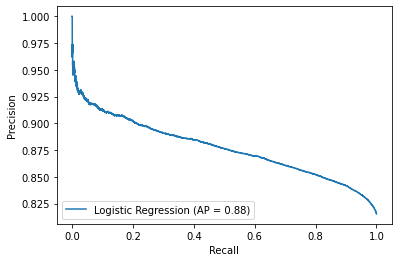

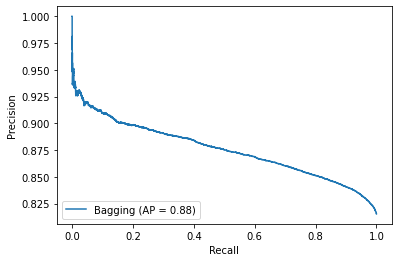

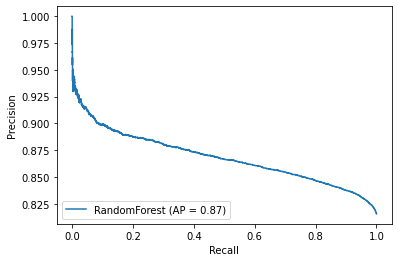

In [16]:
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve
model_17_cw = LogisticRegression(random_state =0, C=3,penalty="l1" , solver="liblinear", max_iter= 10000, class_weight="balanced")
evaluation(model_17_cw, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False )


final_model_Bagging = BaggingClassifier(base_estimator = LogisticRegression(C=4.5, penalty="l1", solver="liblinear" ,random_state =0, max_iter= 10000, class_weight="balanced"),
                                        bootstrap=True, bootstrap_features=True, n_estimators=20)
evaluation(final_model_Bagging, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


final_model_RandomForestClassifier = RandomForestClassifier(class_weight="balanced", criterion="entropy", max_depth=5, max_features=6, n_estimators = 20, random_state=0) 
evaluation(final_model_RandomForestClassifier, train_X_s, train_Y_s, test_X_s, test_Y_s, scoring="recall", plot=False)


plot_precision_recall_curve(model_17_cw, train_X_s, train_Y_s, name = 'Logistic Regression')
plot_precision_recall_curve(final_model_Bagging, train_X_s, train_Y_s, name = 'Bagging')
plot_precision_recall_curve(final_model_RandomForestClassifier, train_X_s, train_Y_s, name = 'RandomForest')



Text(0, 0.5, 'Precision')

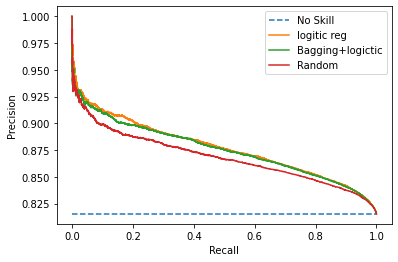

In [38]:
#plt.figure(figsize=(5,8))
change_train_Y_s = train_Y_s.copy()
change_train_Y_s[change_train_Y_s==1] = 0
change_train_Y_s[change_train_Y_s==2] = 1

no_skill = len(change_train_Y_s[change_train_Y_s==1]) / len(change_train_Y_s)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

lr_precision, lr_recall, _ = precision_recall_curve(change_train_Y_s, model_17_cw.predict_proba(train_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "logitic reg")

lr_precision, lr_recall, _ = precision_recall_curve(change_train_Y_s, final_model_Bagging.predict_proba(train_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Bagging+logictic")

lr_precision, lr_recall, _ = precision_recall_curve(change_train_Y_s, final_model_RandomForestClassifier.predict_proba(train_X_s)[:,1] )
plt.plot(lr_recall, lr_precision, label = "Random")

plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')

In [39]:
np.unique(change_train_Y_s)

array([0, 1])

In [40]:
np.unique(train_Y_s)

array([1, 2])